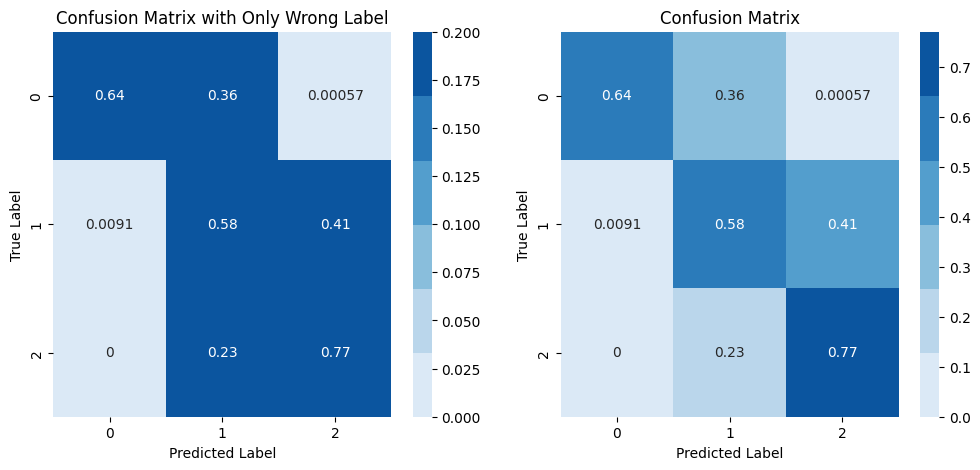

In [1]:
import pandas as pd

df = pd.read_csv("/opt/ml/image-classification-level1-34/model/age_resnext50_labelsmoot/fold_0_age.csv")

from sklearn.metrics import f1_score, confusion_matrix

f1_score(df["epoch_4_label"], df["epoch_4_pred"], average="macro")

import numpy as np
# print(array)
import seaborn as sns

import matplotlib.pyplot as plt

target = df["epoch_4_label"]
pred = df["epoch_4_pred"]

num_class = 3
wrong_idx = (target != pred)  # 틀린 index만 확인.

# 데이터가 많지 않은 경우 원래 class 보다 적은 수의 confusion matrix 가 생성되는 경우가 있습니다. target 이나 pred에 18개 클래스 모두가 발생되지 않는 경우 발생합니다. 옵션에 labels를 추가하여 빈 label이 생기는 것을 방지합니다.
cm = confusion_matrix(df["epoch_4_label"], df["epoch_4_pred"], labels=list(range(num_class)))
normalized_cm = confusion_matrix(target, pred, normalize='true', labels=[_ for _ in range(num_class)])  # normalize 옵션 사용.

# Error 수정; 확인도 제대로 안하고 올렸네요.. ㅠㅠ
_div_array = np.zeros((num_class, 1)) + 1e-6
target_idx, target_counts = np.unique(target, return_counts=True)  # Target 개수 확인.
for _idx, _counts in zip(target_idx, target_counts):
    _div_array[_idx, 0] = _counts
cm = cm / _div_array

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm, annot=True, cmap=sns.color_palette("Blues"), vmax=0.20, ax=ax[0])
sns.heatmap(normalized_cm, annot=True, cmap=sns.color_palette("Blues"), ax=ax[1])
ax[0].set_title('Confusion Matrix with Only Wrong Label')
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("True Label")
ax[1].set_title('Confusion Matrix')
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")
# plt.tight_layout()
# plt.savefig("confusion_matrix.png")

plt.show()


In [3]:
df[wrong_idx]

,epoch_0_path,epoch_0_pred,epoch_0_label,epoch_1_path,epoch_1_pred,epoch_1_label,epoch_2_path,epoch_2_pred,epoch_2_label,epoch_3_path,...,epoch_4_label,epoch_5_path,epoch_5_pred,epoch_5_label,epoch_6_path,epoch_6_pred,epoch_6_label,epoch_7_path,epoch_7_pred,epoch_7_label
0,/opt/ml/P01/data/train/new_imgs/004237_female_...,2,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,2,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,2,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,...,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,1,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,1,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,2,2
2,/opt/ml/P01/data/train/new_imgs/004237_female_...,2,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,2,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,2,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,...,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,1,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,1,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,2,2
4,/opt/ml/P01/data/train/new_imgs/004237_female_...,1,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,1,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,2,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,...,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,1,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,1,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,1,2
5,/opt/ml/P01/data/train/new_imgs/004237_female_...,1,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,2,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,2,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,...,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,1,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,1,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,1,2
6,/opt/ml/P01/data/train/new_imgs/004237_female_...,2,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,2,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,2,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,...,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,1,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,1,2,/opt/ml/P01/data/train/new_imgs/004237_female_...,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,/opt/ml/P01/data/train/new_imgs/003738_female_...,1,1,/opt/ml/P01/data/train/new_imgs/003738_female_...,2,1,/opt/ml/P01/data/train/new_imgs/003738_female_...,1,1,/opt/ml/P01/data/train/new_imgs/003738_female_...,...,1,/opt/ml/P01/data/train/new_imgs/003738_female_...,2,1,/opt/ml/P01/data/train/new_imgs/003738_female_...,1,1,/opt/ml/P01/data/train/new_imgs/003738_female_...,2,1
3696,/opt/ml/P01/data/train/new_imgs/003738_female_...,2,1,/opt/ml/P01/data/train/new_imgs/003738_female_...,2,1,/opt/ml/P01/data/train/new_imgs/003738_female_...,2,1,/opt/ml/P01/data/train/new_imgs/003738_female_...,...,1,/opt/ml/P01/data/train/new_imgs/003738_female_...,1,1,/opt/ml/P01/data/train/new_imgs/003738_female_...,1,1,/opt/ml/P01/data/train/new_imgs/003738_female_...,2,1
3698,/opt/ml/P01/data/train/new_imgs/003738_female_...,1,1,/opt/ml/P01/data/train/new_imgs/003738_female_...,2,1,/opt/ml/P01/data/train/new_imgs/003738_female_...,1,1,/opt/ml/P01/data/train/new_imgs/003738_female_...,...,1,/opt/ml/P01/data/train/new_imgs/003738_female_...,1,1,/opt/ml/P01/data/train/new_imgs/003738_female_...,1,1,/opt/ml/P01/data/train/new_imgs/003738_female_...,2,1
3699,/opt/ml/P01/data/train/new_imgs/003360_female_...,0,0,/opt/ml/P01/data/train/new_imgs/003360_female_...,0,0,/opt/ml/P01/data/train/new_imgs/003360_female_...,0,0,/opt/ml/P01/data/train/new_imgs/003360_female_...,...,0,/opt/ml/P01/data/train/new_imgs/003360_female_...,0,0,/opt/ml/P01/data/train/new_imgs/003360_female_...,0,0,/opt/ml/P01/data/train/new_imgs/003360_female_...,0,0


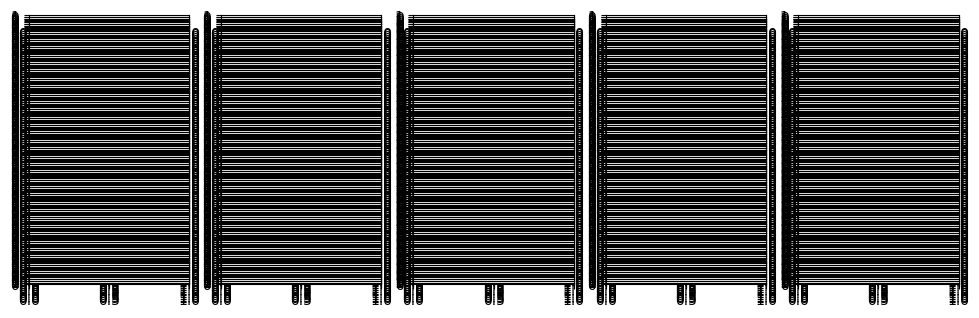

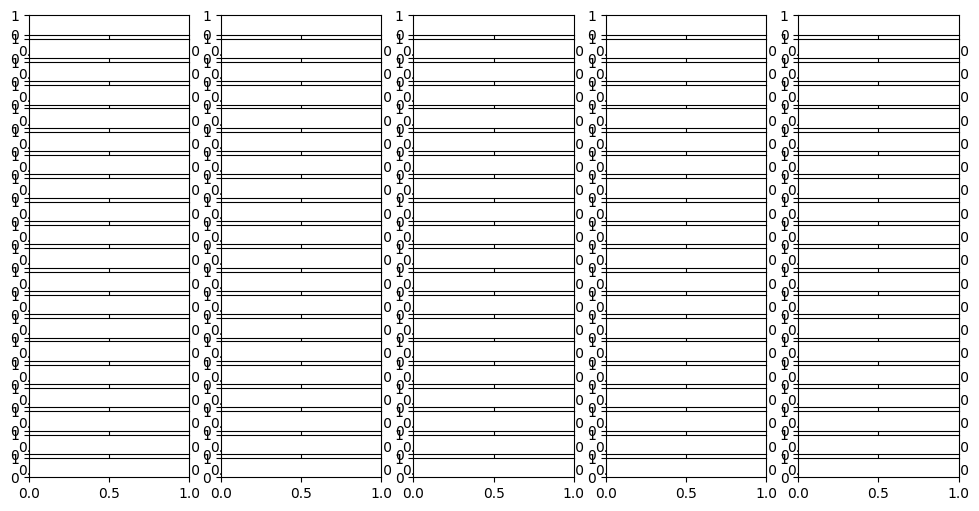

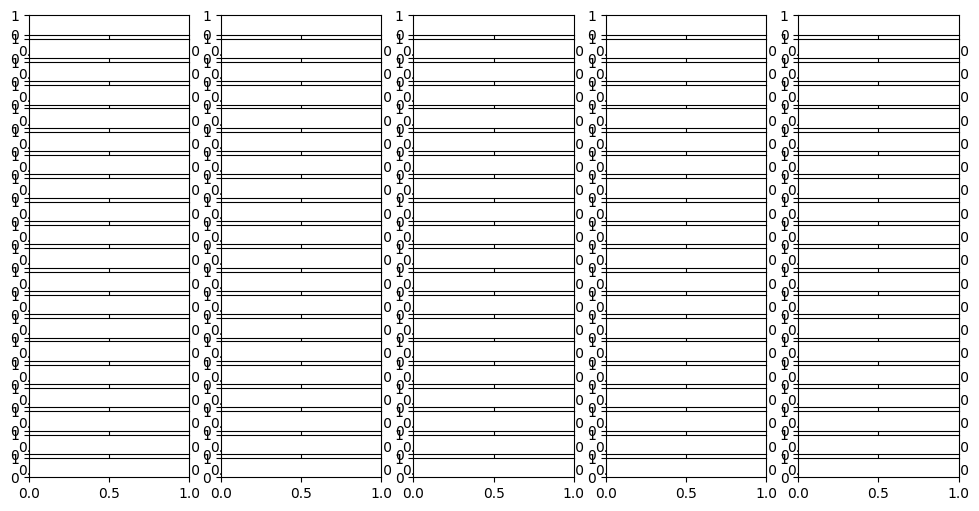

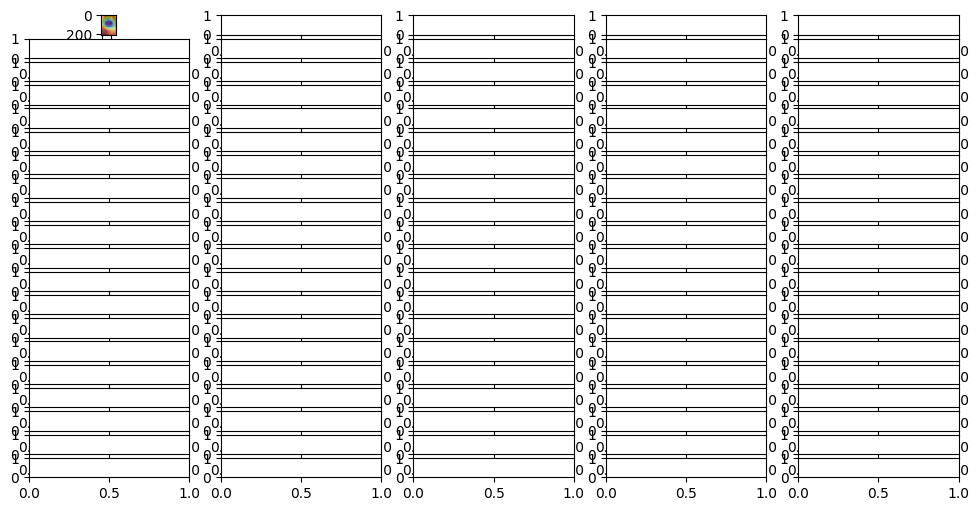

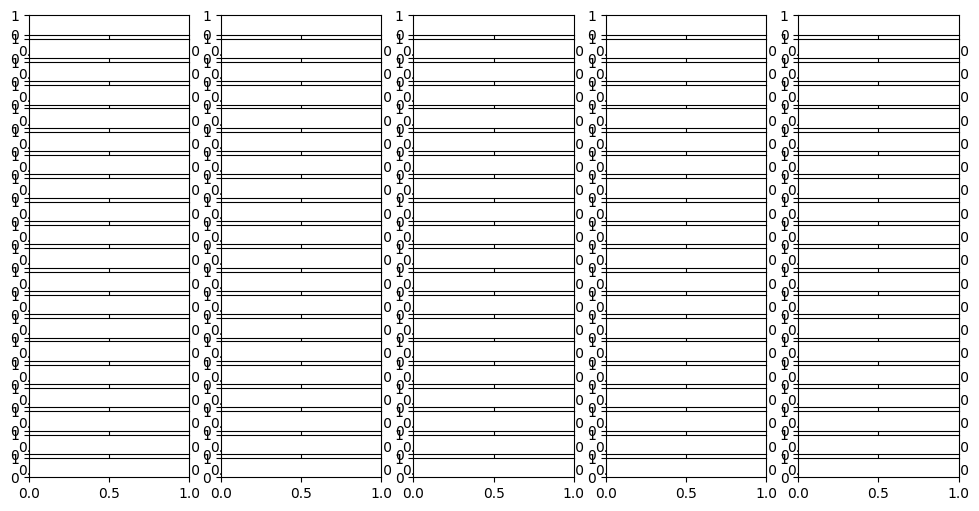

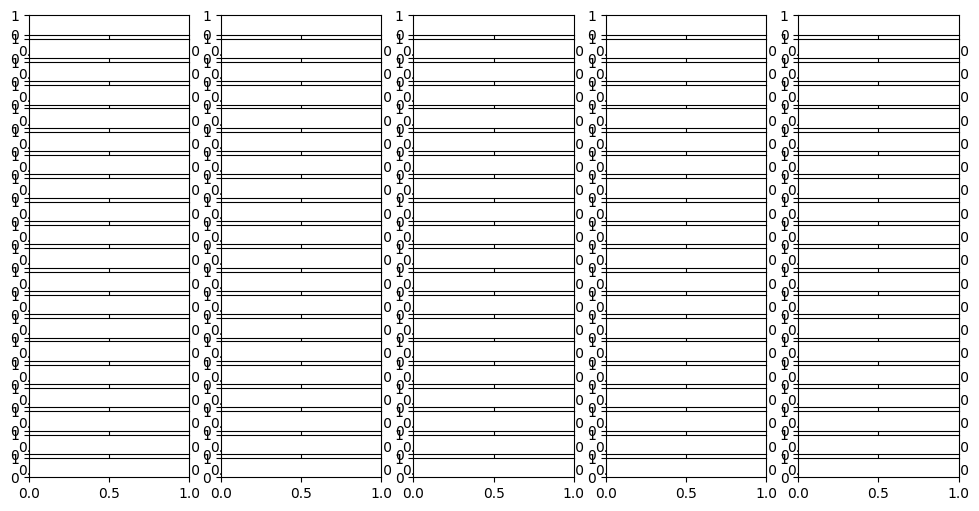

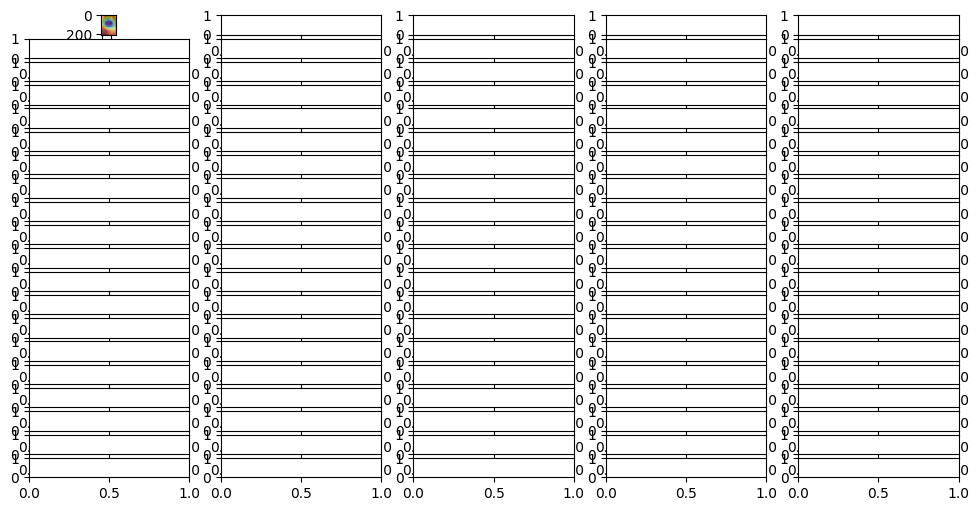

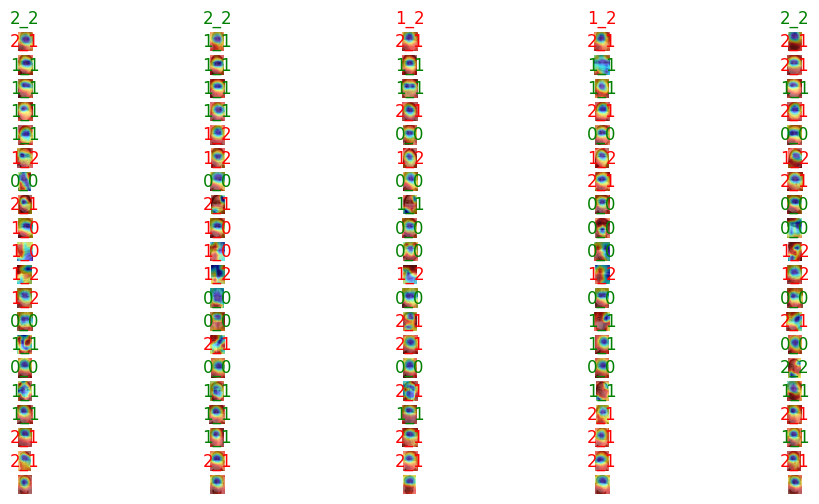

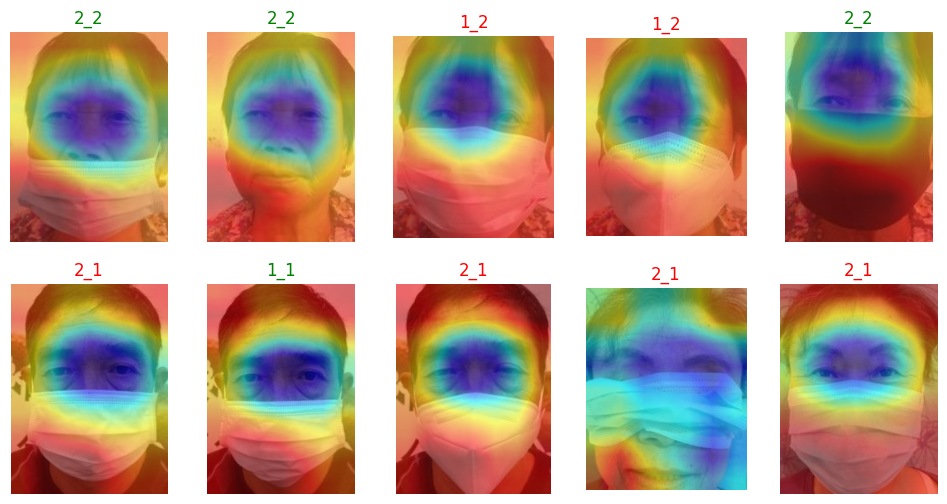

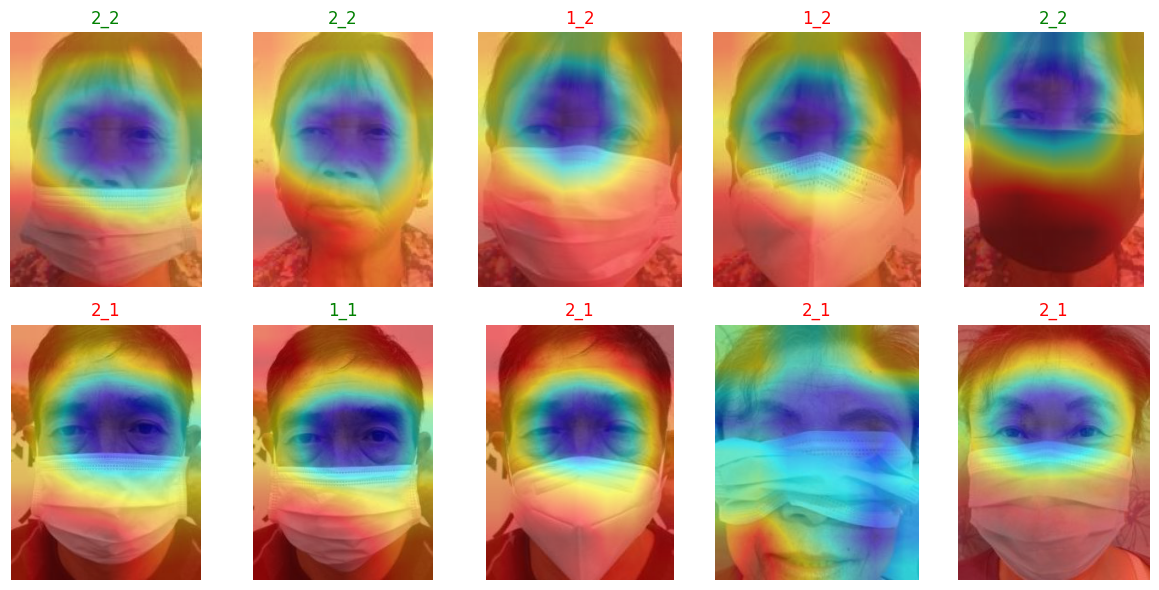

In [22]:
import pandas as pd

df = pd.read_csv("/opt/ml/image-classification-level1-34/model/age_resnext50_labelsmoot/fold_0_age.csv")

from sklearn.metrics import f1_score, confusion_matrix

f1_score(df["epoch_4_label"], df["epoch_4_pred"], average="macro")

import numpy as np
# print(array)
import seaborn as sns

import matplotlib.pyplot as plt

target = df["epoch_4_label"]
pred = df["epoch_4_pred"]

num_class = 3
wrong_idx = (target != pred)  # 틀린 index만 확인.

# 데이터가 많지 않은 경우 원래 class 보다 적은 수의 confusion matrix 가 생성되는 경우가 있습니다. target 이나 pred에 18개 클래스 모두가 발생되지 않는 경우 발생합니다. 옵션에 labels를 추가하여 빈 label이 생기는 것을 방지합니다.
cm = confusion_matrix(df["epoch_4_label"], df["epoch_4_pred"], labels=list(range(num_class)))
normalized_cm = confusion_matrix(target, pred, normalize='true', labels=[_ for _ in range(num_class)])  # normalize 옵션 사용.

# Error 수정; 확인도 제대로 안하고 올렸네요.. ㅠㅠ
_div_array = np.zeros((num_class, 1)) + 1e-6
target_idx, target_counts = np.unique(target, return_counts=True)  # Target 개수 확인.
for _idx, _counts in zip(target_idx, target_counts):
    _div_array[_idx, 0] = _counts
cm = cm / _div_array

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm, annot=True, cmap=sns.color_palette("Blues"), vmax=0.20, ax=ax[0])
sns.heatmap(normalized_cm, annot=True, cmap=sns.color_palette("Blues"), ax=ax[1])
ax[0].set_title('Confusion Matrix with Only Wrong Label')
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("True Label")
ax[1].set_title('Confusion Matrix')
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")
# plt.tight_layout()
# plt.savefig("confusion_matrix.png")

plt.show()


from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
import numpy as np

from PIL import Image
from torchvision import transforms
import torch

import torchvision
import math

from torch import nn


class ResNet18(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.net = torchvision.models.resnet18(pretrained=True)

        self.net.fc = torch.nn.Linear(in_features=512, out_features=num_classes, bias=True)

        torch.nn.init.xavier_uniform_(self.net.fc.weight)
        stdv = 1. / math.sqrt(self.net.fc.weight.size(1))
        self.net.fc.bias.data.uniform_(-stdv, stdv)

    def forward(self, x):
        x = self.net(x)
        return x

preprocess = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

    
net = ResNet18(3)
net_state = torch.load("/opt/ml/image-classification-level1-34/Base/model/age_solo_renet18_3c/0_1_accuracy_80.77%_f1_75.27%.pth")
net.load_state_dict(net_state)
model = net.net

# # net = resnet50(pretrained=True)
target_layer = model.layer4[-1]
# # Create an input tensor image for your model..
# # Note: input_tensor can be a batch tensor with several images!

# # Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layer=target_layer, use_cuda=True)

# # If target_category is None, the highest scoring category
# # will be used for every image in the batch.
# # target_category can also be an integer, or a list of different integers
# # for every image in the batch.
target_category = None
import matplotlib.pyplot as plt


cols = 5
rows = len(df[wrong_idx].iloc[:10]) // cols

figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 6))
for i, df_row in enumerate(df[wrong_idx].iloc[:10].iloc):
    path = df_row["epoch_0_path"]
    pred = df_row["epoch_0_pred"]
    label = df_row["epoch_0_label"]

    input_image = Image.open(path)
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0)
    input_tensor = input_batch

    # # # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
    grayscale_cam = cam(input_tensor=input_tensor, target_category = target_category)

    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = grayscale_cam[0, :]

    # print(type(grayscale_cam))
    image = show_cam_on_image(np.array(input_image)/255, grayscale_cam)

    color = "green" if label == pred else "red"
    ax.ravel()[i].imshow(image)
    ax.ravel()[i].set_title(str(pred) + "_" + str(label), color=color)
    ax.ravel()[i].set_axis_off()

#     model(input_tensor.to("cuda"))
plt.tight_layout()
plt.show()   
# # def display_image_grid(images_filepaths, predicted_labels=(), cols=5):


# for i, image_filepath in enumerate(images_filepaths):
#     image = cv2.imread(image_filepath)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     true_label = os.path.normpath(image_filepath).split(os.sep)[-2]
#     predicted_label = predicted_labels[i] if predicted_labels else true_label
    
    
    


In [26]:
for i in df[wrong_idx][:10].iloc:
    print(i["epoch_0_path"])

/opt/ml/P01/data/train/new_imgs/004237_female_Asian_59/incorrect_mask.jpg
/opt/ml/P01/data/train/new_imgs/004237_female_Asian_59/normal.jpg
/opt/ml/P01/data/train/new_imgs/004237_female_Asian_59/mask4.jpg
/opt/ml/P01/data/train/new_imgs/004237_female_Asian_59/mask1.jpg
/opt/ml/P01/data/train/new_imgs/004237_female_Asian_59/mask5.jpg
/opt/ml/P01/data/train/new_imgs/001423_male_Asian_53/mask3.jpg
/opt/ml/P01/data/train/new_imgs/001423_male_Asian_53/mask4.jpg
/opt/ml/P01/data/train/new_imgs/001423_male_Asian_53/mask1.jpg
/opt/ml/P01/data/train/new_imgs/000576_female_Asian_56/incorrect_mask.jpg
/opt/ml/P01/data/train/new_imgs/000576_female_Asian_56/mask2.jpg
